In [1]:
import pandas as pd
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Пропуски отсутствуют! Пропуски в последнем столбике я интерпретирую как отсутствие нарушения, т.е. как значение!
Кодифицируем данные!


In [3]:
df.iloc[:,1].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

Закодируем Male - 1 Female - 0
Ну и так далее для столбиков со строковыми значениями


In [4]:
df.iloc[:,3].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [5]:
df.iloc[:,8].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [6]:
df.iloc[:,9].value_counts()

Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64

Разобью на группы: верхнее и ниже 

In [7]:
df.iloc[:,12].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

и еще учтем 219 - без нарушений
За дело!

In [8]:
# df = pd.get_dummies(df, columns=['Gender'])

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [10]:
# df.iloc[:,1]=df.iloc[:,1].replace({'Male':1,'Female':0}).astype(int)

In [11]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,1,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,1,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [12]:
# df.iloc[:,3]=df.iloc[:,3].replace({'Nurse':1,'Doctor':2,'Engineer':3,'Lawyer':4,'Teacher':5,'Accountant':6,'Salesperson':7,'Software Engineer':8,'Scientist':9,'Sales Representative':10,'Manager':11}).astype(int)
df['Occupation'] = encoder.fit_transform(df['Occupation'])

In [13]:
df['BMI Category']=df['BMI Category'].replace({'Normal':1,'Overweight':2,'Normal Weight':3,'Obese':4}).astype(int)
# df['BMI Category'] = encoder.fit_transform(df['BMI Category'])

C:\Users\User\AppData\Local\Temp\ipykernel_1924\1974156101.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BMI Category']=df['BMI Category'].replace({'Normal':1,'Overweight':2,'Normal Weight':3,'Obese':4}).astype(int)


In [14]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,9,6.1,6,42,6,2,126/83,77,4200,NaN
1,2,1,28,1,6.2,6,60,8,1,125/80,75,10000,NaN
2,3,1,28,1,6.2,6,60,8,1,125/80,75,10000,NaN
3,4,1,28,6,5.9,4,30,8,4,140/90,85,3000,Sleep Apnea
4,5,1,28,6,5.9,4,30,8,4,140/90,85,3000,Sleep Apnea


In [15]:
df['Sleep Disorder']=df['Sleep Disorder'].replace({None:0,'Sleep Apnea':1,'Insomnia':2}).astype(int)
# df.iloc[:,12] = encoder.fit_transform(df.iloc[:,12])

C:\Users\User\AppData\Local\Temp\ipykernel_1924\3720983043.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Disorder']=df['Sleep Disorder'].replace({None:0,'Sleep Apnea':1,'Insomnia':2}).astype(int)


In [16]:
df[['upper_presure', 'low_pressure']] = df.iloc[:, 9].str.split('/', expand=True)
df['upper_presure'] = df['upper_presure'].astype(int)
df['low_pressure'] = df['low_pressure'].astype(int)

In [17]:
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,upper_presure,low_pressure
0,1,1,27,9,6.1,6,42,6,2,126/83,77,4200,0,126,83
1,2,1,28,1,6.2,6,60,8,1,125/80,75,10000,0,125,80
2,3,1,28,1,6.2,6,60,8,1,125/80,75,10000,0,125,80
3,4,1,28,6,5.9,4,30,8,4,140/90,85,3000,1,140,90
4,5,1,28,6,5.9,4,30,8,4,140/90,85,3000,1,140,90


In [18]:
from sklearn.preprocessing import PolynomialFeatures

# Исходные данные
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(df[['Sleep Duration', 'Daily Steps']])

# Получение названий признаков с помощью get_feature_names_out
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Sleep Duration', 'Daily Steps']))

# Теперь можно объединить df с новыми признаками
df = pd.concat([df, df_poly[['Sleep Duration', 'Daily Steps', 'Sleep Duration^2', 'Sleep Duration Daily Steps', 'Daily Steps^2']]], axis=1)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,upper_presure,low_pressure,Sleep Duration,Daily Steps,Sleep Duration^2,Sleep Duration Daily Steps,Daily Steps^2
0,1,1,27,9,6.1,6,42,6,2,126/83,77,4200,0,126,83,6.1,4200.0,37.21,25620.0,17640000.0
1,2,1,28,1,6.2,6,60,8,1,125/80,75,10000,0,125,80,6.2,10000.0,38.44,62000.0,100000000.0
2,3,1,28,1,6.2,6,60,8,1,125/80,75,10000,0,125,80,6.2,10000.0,38.44,62000.0,100000000.0
3,4,1,28,6,5.9,4,30,8,4,140/90,85,3000,1,140,90,5.9,3000.0,34.81,17700.0,9000000.0
4,5,1,28,6,5.9,4,30,8,4,140/90,85,3000,1,140,90,5.9,3000.0,34.81,17700.0,9000000.0


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Person ID                   374 non-null    int64  
 1   Gender                      374 non-null    int32  
 2   Age                         374 non-null    int64  
 3   Occupation                  374 non-null    int32  
 4   Sleep Duration              374 non-null    float64
 5   Quality of Sleep            374 non-null    int64  
 6   Physical Activity Level     374 non-null    int64  
 7   Stress Level                374 non-null    int64  
 8   BMI Category                374 non-null    int32  
 9   Blood Pressure              374 non-null    object 
 10  Heart Rate                  374 non-null    int64  
 11  Daily Steps                 374 non-null    int64  
 12  Sleep Disorder              374 non-null    int32  
 13  upper_presure               374 non

In [61]:
from sklearn.model_selection import train_test_split
temp=pd.concat([df.iloc[:,1:9],df.iloc[:,10:12]],axis=1)
temp=pd.concat([temp,df.iloc[:,13:]],axis=1)
X_train, X_test, y_train, y_test = train_test_split(temp, df.iloc[:,12], test_size=0.2, random_state=42)

In [62]:
# X_train.head()
print(len(X_train), len(X_test), len(y_train), len(y_test))

299 75 299 75


В качестве модели давайте применим логистическую регрессию, т.к. очевидно сталкнулись с задачей классификации!

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
test=model.predict(X_test)
test=pd.DataFrame({"predict":test,"present":y_test})
test.sample(5)

,predict,present
229,2,2
46,0,0
33,2,0
119,0,0
352,1,1


In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Точность
accuracy = accuracy_score(test['present'], test['predict'])
print("Accuracy:", accuracy)

# Матрица ошибок
conf_matrix = confusion_matrix(test['present'], test['predict'])
print("Confusion Matrix:\n", conf_matrix)

# Отчёт классификации
print("Classification Report:\n", classification_report(test['present'], test['predict']))

Accuracy: 0.76
Confusion Matrix:
 [[32  0 11]
 [ 1 13  2]
 [ 2  2 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82        43
           1       0.87      0.81      0.84        16
           2       0.48      0.75      0.59        16

    accuracy                           0.76        75
   macro avg       0.75      0.77      0.75        75
weighted avg       0.81      0.76      0.77        75



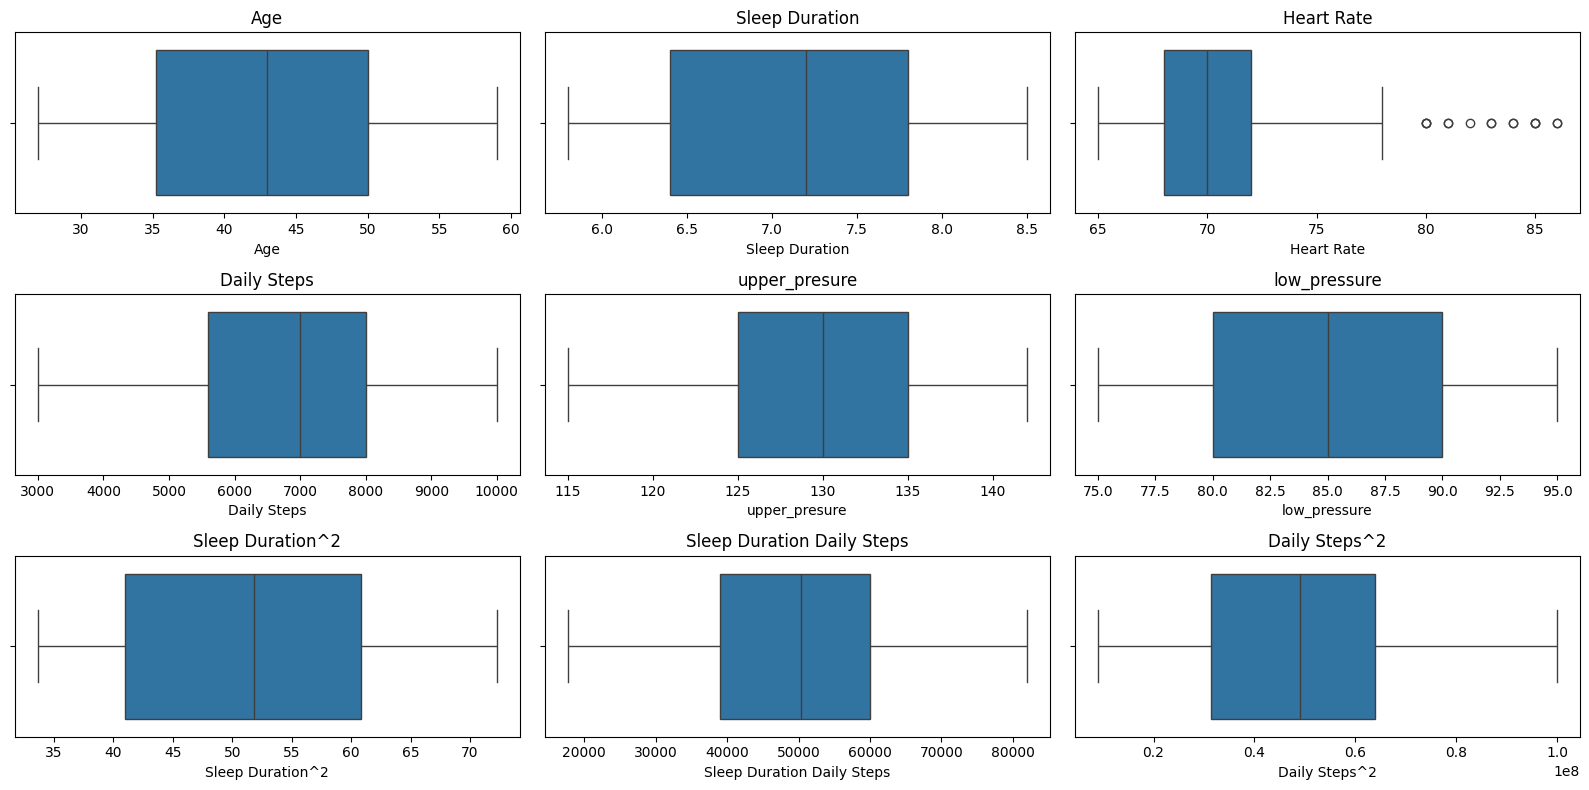

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 8))
axes = axes.flatten()
temp_df=df.iloc[:,[2,4,10,11,13,14,17,18,19]]
for i in range(9):
    sns.boxplot(x=temp_df.iloc[:,i], ax=axes[i])
    axes[i].set_title(f"{temp_df.columns[i]}")

plt.tight_layout()
plt.show()

Выбросов нет! Этим способом точность логистической регрессии не повысить! Сильно отличаються по масштабу количество шагов в день и наши полиномиальные признаки!Стандартизируем!


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)


model = LogisticRegression(max_iter=1000)
model.fit(X_train_s, y_train)
test=model.predict(X_test_s)
test=pd.DataFrame({"predict":test,"present":y_test})
test.sample(5)

,predict,present
239,2,2
345,1,1
193,2,2
352,1,1
332,0,0


In [67]:
# Точность
accuracy = accuracy_score(test['present'], test['predict'])
print("Accuracy:", accuracy)

# Матрица ошибок
conf_matrix = confusion_matrix(test['present'], test['predict'])
print("Confusion Matrix:\n", conf_matrix)

# Отчёт классификации
print("Classification Report:\n", classification_report(test['present'], test['predict']))

Accuracy: 0.8933333333333333
Confusion Matrix:
 [[41  0  2]
 [ 2 12  2]
 [ 1  1 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.92      0.75      0.83        16
           2       0.78      0.88      0.82        16

    accuracy                           0.89        75
   macro avg       0.88      0.86      0.86        75
weighted avg       0.90      0.89      0.89        75



Стандартизация сильно повысила надои и яйценоскость! Испытаем SVC

In [68]:
from sklearn.svm import SVC

# Обучение SVM с RBF ядром
model = SVC(kernel='rbf', C=1.0, gamma=0.5, probability=True)
model.fit(X_train_s, y_train)

test=model.predict(X_test_s)
test=pd.DataFrame({"predict":test,"present":y_test})
test.sample(5)

,predict,present
93,0,1
346,1,1
372,1,1
352,1,1
250,2,2


In [53]:
# Точность
accuracy = accuracy_score(test['present'], test['predict'])
print("Accuracy:", accuracy)

# Матрица ошибок
conf_matrix = confusion_matrix(test['present'], test['predict'])
print("Confusion Matrix:\n", conf_matrix)

# Отчёт классификации
print("Classification Report:\n", classification_report(test['present'], test['predict']))

Accuracy: 0.88
Confusion Matrix:
 [[42  0  1]
 [ 3 11  2]
 [ 1  2 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.85      0.69      0.76        16
           2       0.81      0.81      0.81        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75



В случае SVC прироста точности нет!

Линейную регрессию применять не будем, а вот деревья попробуем:

In [89]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000, max_depth=15, random_state=42)

rf.fit(X_train_s, y_train)
y_pred_all = model.predict(X_test_s)

print(f"R2 Score: {rf.score(X_test_s, y_test):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_all)}")

R2 Score: 0.70
Accuracy: 0.8933333333333333


In [90]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=15, random_state=42)

gbr.fit(X_train_s, y_train)
y_pred_all = model.predict(X_test_s)

print(f"R2 Score: {gbr.score(X_test_s, y_test):.2f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_all)}")

R2 Score: 0.68
Accuracy: 0.8933333333333333


Логистическая регрессия рулит! Какие-то подозрительно одинаковые результаты!? Далее будем работать с логистической регрессией! Деревом проверим важность признаков

In [72]:
importances = gbr.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)

                       Feature  Importance
7                 BMI Category    0.527962
5      Physical Activity Level    0.255663
10               upper_presure    0.086684
11                low_pressure    0.051079
1                          Age    0.014813
6                 Stress Level    0.011792
15  Sleep Duration Daily Steps    0.010112
3               Sleep Duration    0.008365
9                  Daily Steps    0.007977
12              Sleep Duration    0.006622
14            Sleep Duration^2    0.004464
4             Quality of Sleep    0.003444
0                       Gender    0.002720
16               Daily Steps^2    0.002537
13                 Daily Steps    0.002145
8                   Heart Rate    0.001932
2                   Occupation    0.001689


Проверим значимость признаков по тепловой карте и матрице корреляций!

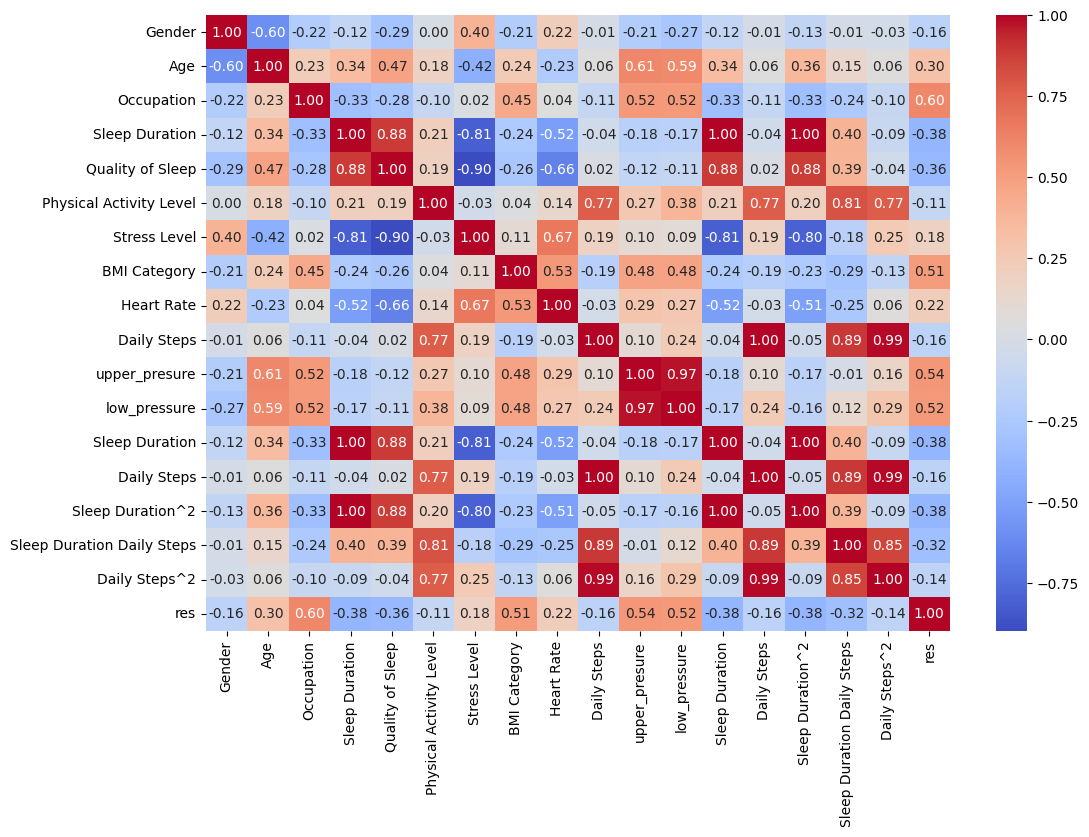

In [80]:
temp["res"]=df['Sleep Disorder']
m_corr = temp.corr()

# Увеличение размера тепловой карты
plt.figure(figsize=(12, 8))  # Укажите нужные размеры (ширина, высота)
sns.heatmap(m_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Согласно тепловой карте на расстройства сна (я обозначил этот показатель коротко и емко "res")влияют: профессия, масса тела, всякое давление, причем прямо - т.е. надо думать чем больше вышеперечисленные показатели тем хуже расстройство сна или типтого. По важности признаков получается что рулит индекс массы тела, физактивность, всякие давления, а вот профессия влияет слабо.

In [81]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_s, y_train)
test=model.predict(X_test_s)
test=pd.DataFrame({"predict":test,"present":y_test})
test.sample(5)

,predict,present
372,1,1
255,2,2
22,0,0
361,1,1
46,0,0


In [82]:
# Точность
accuracy = accuracy_score(test['present'], test['predict'])
print("Accuracy:", accuracy)

# Матрица ошибок
conf_matrix = confusion_matrix(test['present'], test['predict'])
print("Confusion Matrix:\n", conf_matrix)

# Отчёт классификации
print("Classification Report:\n", classification_report(test['present'], test['predict']))

Accuracy: 0.8933333333333333
Confusion Matrix:
 [[41  0  2]
 [ 2 12  2]
 [ 1  1 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.92      0.75      0.83        16
           2       0.78      0.88      0.82        16

    accuracy                           0.89        75
   macro avg       0.88      0.86      0.86        75
weighted avg       0.90      0.89      0.89        75



In [83]:
from sklearn.feature_selection import RFE, SelectKBest, f_classif

# === Отбор признаков: RFE ===
rfe_selector = RFE(estimator=model, n_features_to_select=10, step=1)
X_train_rfe = rfe_selector.fit_transform(X_train_s, y_train)
X_test_rfe = rfe_selector.transform(X_test_s)

model_rfe = LogisticRegression(max_iter=1000, random_state=42)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"Accuracy после отбора RFE: {accuracy_rfe:.4f}")

# === Отбор признаков: SelectKBest ===
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_train_kbest = select_k_best.fit_transform(X_train_s, y_train)
X_test_kbest = select_k_best.transform(X_test_s)

model_kbest = LogisticRegression(max_iter=1000, random_state=42)
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

print(f"Accuracy после отбора SelectKBest: {accuracy_kbest:.4f}")

# Итог:
print("\nСравнение:")
print(f"Accuracy на всех признаках: {accuracy:.4f}")
print(f"Accuracy после RFE: {accuracy_rfe:.4f}")
print(f"Accuracy после SelectKBest: {accuracy_kbest:.4f}")

Accuracy после отбора RFE: 0.8933
Accuracy после отбора SelectKBest: 0.8800

Сравнение:
Accuracy на всех признаках: 0.8933
Accuracy после RFE: 0.8933
Accuracy после SelectKBest: 0.8800


применив методы отбора признаков замечаем, что признаки то сильно не сыграли! Испытаем на/в лесу

In [84]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=15, random_state=42)

rf.fit(X_train_s, y_train)
y_pred_all = model.predict(X_test_s)

print(f"R2 Score: {rf.score(X_test_s, y_test):.2f}")

R2 Score: 0.70


In [86]:
from sklearn.ensemble import RandomForestClassifier
# === Отбор признаков: RFE ===
rfe_selector = RFE(estimator=rf, n_features_to_select=10, step=1)
X_train_rfe = rfe_selector.fit_transform(X_train_s, y_train)
X_test_rfe = rfe_selector.transform(X_test_s)

model_rfe = RandomForestClassifier(n_estimators=100, random_state=42)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"Accuracy после отбора RFE: {accuracy_rfe:.4f}")

# === Отбор признаков: SelectKBest ===
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_train_kbest = select_k_best.fit_transform(X_train_s, y_train)
X_test_kbest = select_k_best.transform(X_test_s)

model_kbest = RandomForestClassifier(n_estimators=100, random_state=42)
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

print(f"Accuracy после отбора SelectKBest: {accuracy_kbest:.4f}")

# Итог:
print("\nСравнение:")
print(f"Accuracy на всех признаках: {accuracy_score(y_test, y_pred_all):.4f}")
print(f"Accuracy после RFE: {accuracy_rfe:.4f}")
print(f"Accuracy после SelectKBest: {accuracy_kbest:.4f}")

Accuracy после отбора RFE: 0.8800
Accuracy после отбора SelectKBest: 0.8800

Сравнение:
Accuracy на всех признаках: 0.8933
Accuracy после RFE: 0.8800
Accuracy после SelectKBest: 0.8800


In [97]:
from sklearn.model_selection import GridSearchCV

# === Гиперпараметры для настройки ===
param_grid = {
    'n_estimators': [100, 200, 300,500,1000],  # Количество деревьев
    'max_depth': [None,1,2,5, 10, 20, 30],  # Глубина дерева
    'min_samples_split': [2, 5, 10],  # Минимальное число образцов для разделения
    'min_samples_leaf': [1, 2, 4],    # Минимальное число образцов в листе
}

# === GridSearchCV ===
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Лучшие параметры (GridSearchCV): {grid_search.best_params_}")
best_model_grid = grid_search.best_estimator_
y_pred_grid = best_model_grid.predict(X_test_s)
print(f"Accuracy (GridSearchCV): {accuracy_score(y_test, y_pred_grid):.4f}")

# === RandomizedSearchCV ===
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)
random_search.fit(X_train_s, y_train)

print(f"Лучшие параметры (RandomizedSearchCV): {random_search.best_params_}")
best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test_s)
print(f"Accuracy (RandomizedSearchCV): {accuracy_score(y_test, y_pred_random):.4f}")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan

Лучшие параметры (GridSearchCV): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

Техника не выдерживает, земля уходит из-под ног, постоянно вылазиит какая-то ошибка, но получаем результат! Вставим его в модель!

In [98]:
rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

rf.fit(X_train_s, y_train)
y_pred_all = model.predict(X_test_s)

print(f"Accuracy: {accuracy_score(y_test, y_pred_all):.4f}")
print(f"R2 Score: {rf.score(X_test_s, y_test):.2f}")

Accuracy: 0.8933
R2 Score: 0.71


In [ ]:
И! Получили тот же результат, что и был оптимальным изначально! Ура!

In [100]:
# Определяем гиперпараметры для поиска
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],  # 'lbfgs' не поддерживает l1, saga универсальный
    'max_iter': [100, 500, 1000]
}

# Инициализация модели
model = LogisticRegression(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_s, y_train)

# Лучшая модель
best_model = grid_search.best_estimator_
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Accuracy на тесте: {accuracy_score(y_test, best_model.predict(X_test_s)):.4f}")

Лучшие параметры: {'C': 0.01, 'max_iter': 100, 'penalty': None, 'solver': 'saga'}
Accuracy на тесте: 0.9067


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
225 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\

In [105]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 500, 1000]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=50, 
                                   cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_s, y_train)

# Лучшая модель
best_model = random_search.best_estimator_
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Accuracy на тесте: {accuracy_score(y_test, best_model.predict(X_test_s)):.4f}")

Лучшие параметры: {'solver': 'saga', 'penalty': None, 'max_iter': 100, 'C': 1}
Accuracy на тесте: 0.9067


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
105 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\

Вывод: для логистической модели наблюдаем покращення - от 0.89 до 0.9! Для леса - все без изменений! Может быть недостаточно нагенерировали признаков. Важность признаков вцелом аналогична тепловой карте матрицы корреляций! Надо отметить, что данных маловато и они не симметричны: много нулей в значениях целевой переменной, что может мешать обучению.